In [1]:
import sys
from os import path
sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import numpy as np
from tabulate import tabulate

In [2]:
def print_table(data):
    table = [["Training Set",data[0],data[1]],
         ["Test Set",data[2],data[3]]]
    print(tabulate(table, headers=["MSE", "Accuracy"]))

def print_table_final(data):
    table = [["Training Set",data[0],data[1], data[2], data[3]],
         ["Test Set",data[4],data[5],data[6], data[7] ]]
    print(tabulate(table, headers=["Mean mse","Std mse", "Mean Accuracy", "Std Accuracy"]))

# Monk 3

In [3]:
#Load dataset
print("Load Monk DataSet")
X_train, Y_train = load_monk("3", "train")
X_test, Y_test = load_monk("3", "test")

Load Monk DataSet


In [29]:
len(X_train)

122

## Batch

### Overfitting

### test: 
- 17->4->1
- lr: 0.9
- kernel_regularizer: 0
- momentum: 0.6
- nesterov: True

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


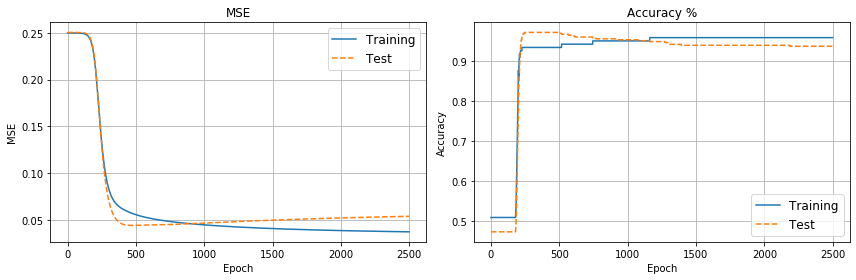

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0374227    0.959016
Test Set      0.0540106    0.9375


In [6]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.00001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.00001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.97,
        momentum = 0.6,
        nesterov = True
    )
)
# Batch
model.fit(X_train,
            Y_train, 
            epochs=2500, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history, loss = 'MSE', orientation = "horizontal", name = "monk3_overfitting" )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


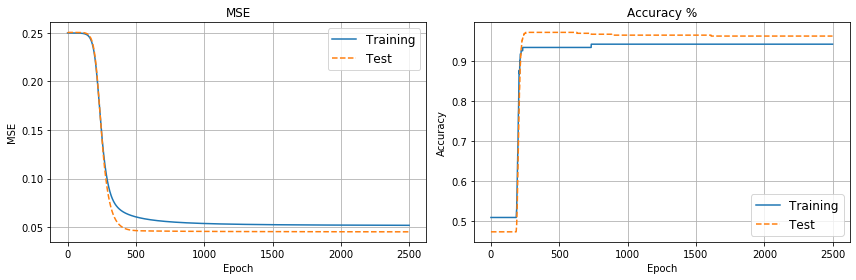

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0518786    0.942623
Test Set      0.0451669    0.962963


In [7]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.00001, kernel_regularizer = 0.001)
model.add(1, kernel_initializer = 0.00001, kernel_regularizer = 0.001)

model.set_optimizer(
    SGD(
        lr = 0.97,
        momentum = 0.6,
        nesterov = True
    )
)
# Batch
model.fit(X_train,
            Y_train, 
            epochs=2500, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history, loss = 'MSE', orientation = "horizontal", name = "monk3_over_reg" )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### Relu

### test: 
- 17->4->1
- lr: 0.4
- kernel_regularizer: 0.0025
- momentum: 0.6
- nesterov: True

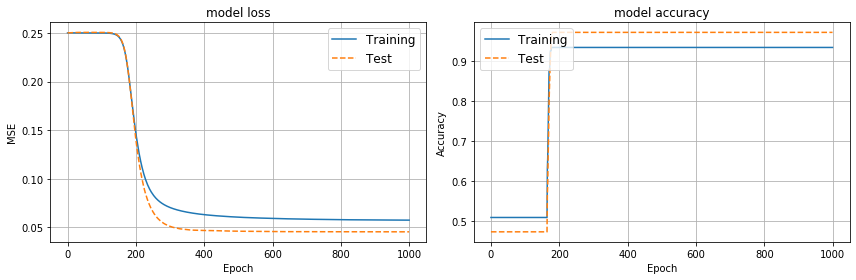

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0574695    0.934426
Test Set      0.0454556    0.972222


In [16]:
model = Mlp()
model.add(4, input= 17, activation="relu", kernel_initializer = 0.001, kernel_regularizer = 0.0025)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.0025)

model.set_optimizer(
    SGD(
        lr = 0.4,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### test: 
- 17->4->1
- lr: 0.6
- kernel_regularizer: 0.0025
- momentum: 0.6
- nesterov: True

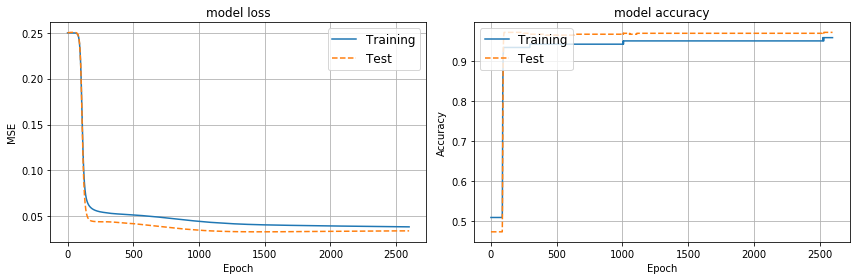

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.038424     0.959016
Test Set      0.0340398    0.972222


In [21]:
model = Mlp()
model.add(4, input= 17, activation="relu", kernel_initializer = 0.001, kernel_regularizer = 0.0025)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.0025)

model.set_optimizer(
    SGD(
        lr = 0.6,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=2600, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# Prova con Nesterov corretto

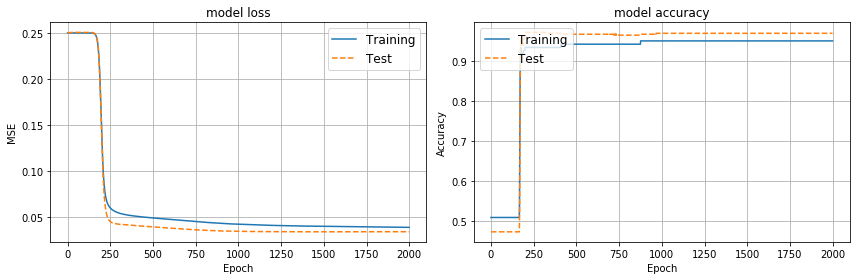

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0389734    0.95082
Test Set      0.0342524    0.969907


In [24]:
model = Mlp()
model.add(4, input= 17, activation="relu", kernel_initializer = 0.001, kernel_regularizer = 0.0025)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.0025)

model.set_optimizer(
    SGD(
        lr = 0.6,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=2000, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### Test no relu

### test (reg): 
- 17->4->1
- lr: 0.9
- kernel_regularizer: 0.001
- momentum: 0.6
- nesterov: True

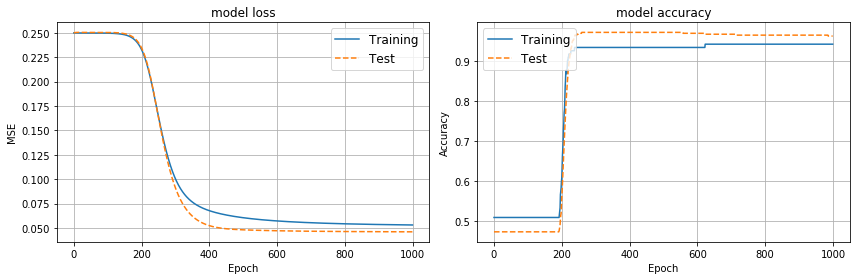

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0531257    0.942623
Test Set      0.046106     0.962963


In [25]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0.001)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.001)

model.set_optimizer(
    SGD(
        lr = 0.9,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

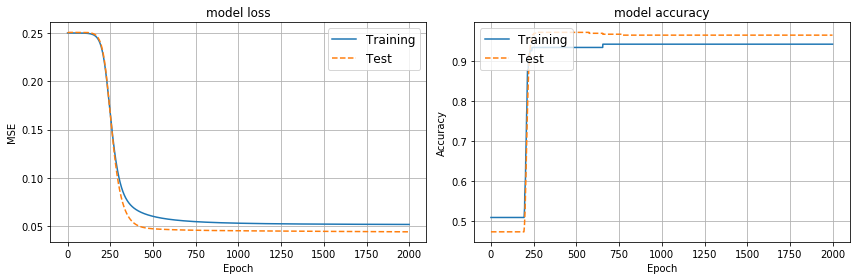

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0520214    0.942623
Test Set      0.0443867    0.965278


In [27]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0.001)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.001)

model.set_optimizer(
    SGD(
        lr = 0.9,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=2000, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### test (no reg): 
- 17->4->1
- lr: 0.9
- kernel_regularizer: 0.001
- momentum: 0.6
- nesterov: True

Qua ho tolto la reg.

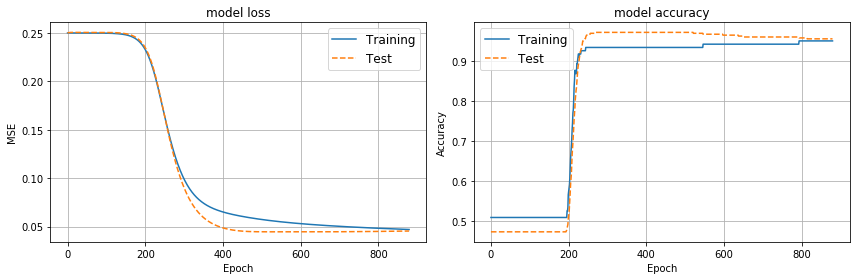

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0470555    0.95082
Test Set      0.045464     0.956019


In [38]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.9,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=880, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### test (no reg): 
- 17->4->1
- lr: 0.9
- kernel_regularizer: 0.001
- momentum: 0.6
- nesterov: True

Senza Nesterov impiega più epoche per convergere.

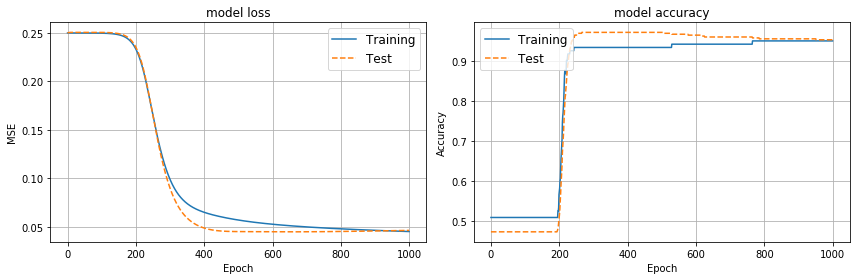

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0450513    0.95082
Test Set      0.0462293    0.953704


In [39]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.9,
        momentum = 0.6,
        nesterov = False
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

## Online

### test: 
- 17->4->1
- lr: 0.01
- kernel_regularizer: 0
- momentum: 0.6
- nesterov: True

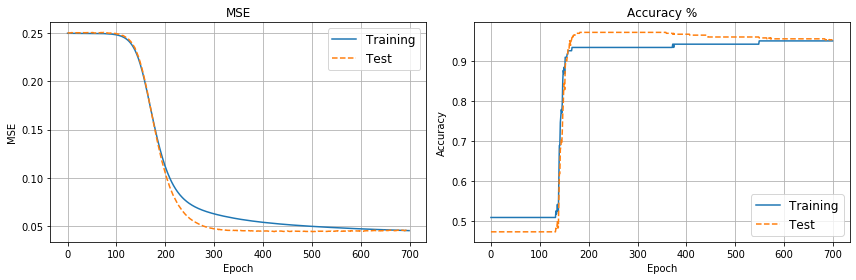

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0451861    0.95082
Test Set      0.0453592    0.953704


In [8]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.01,
        momentum = 0.6,
        nesterov = False
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=700, 
            batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

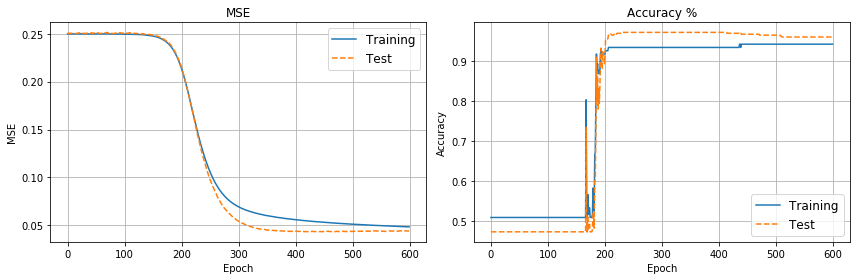

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0482799    0.942623
Test Set      0.0439835    0.960648


In [11]:
model = Mlp()
model.add(10, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.01,
        momentum = 0.5,
        nesterov = False
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=600, 
            batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### test: 
- 17->4->1
- lr: 0.01
- kernel_regularizer: 0
- momentum: 0.8
- nesterov: True

Aumentando il momentum andiamo in overfitting (online).

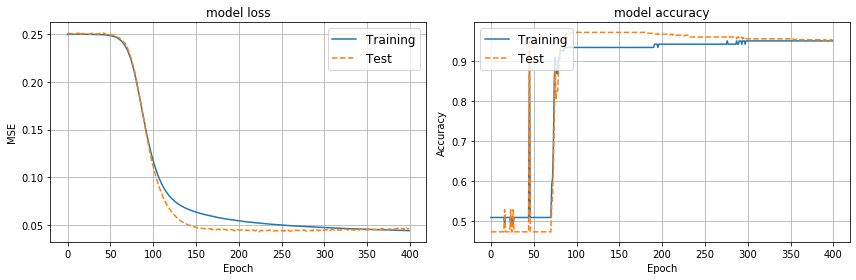

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0441293    0.95082
Test Set      0.0463625    0.953704


In [44]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.01,
        momentum = 0.8,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=400, 
            batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

## Mini Batch

### test: 
- 17->4->1
- lr: 0.6
- kernel_regularizer: 0
- momentum: 0.3
- nesterov: True

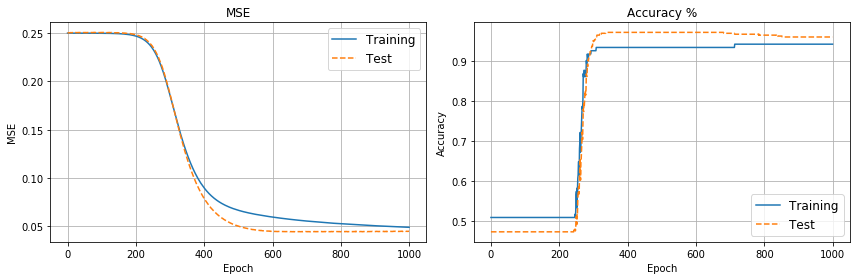

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0490377    0.942623
Test Set      0.0448383    0.960648


In [12]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.6,
        momentum = 0.3,
        nesterov = False
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            batch_size=61,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

### test: 
- 17->4->1
- lr: 0.7
- kernel_regularizer: 0
- momentum: 0.3
- nesterov: True

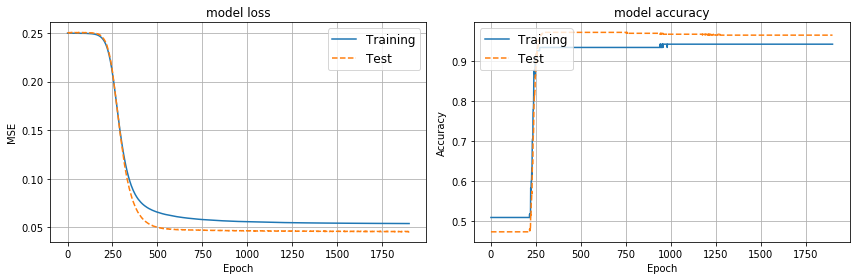

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0538254    0.942623
Test Set      0.0455386    0.965278


In [50]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0.001)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.001)

model.set_optimizer(
    SGD(
        lr = 0.7,
        momentum = 0.3,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1900, 
            batch_size=61,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# Final model (batch)

Vedi monk3_analysis

## No Reg.

### test: 
- 17->4->1
- lr: 0.8
- kernel_regularizer: 0
- momentum: 0.6
- nesterov: True

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


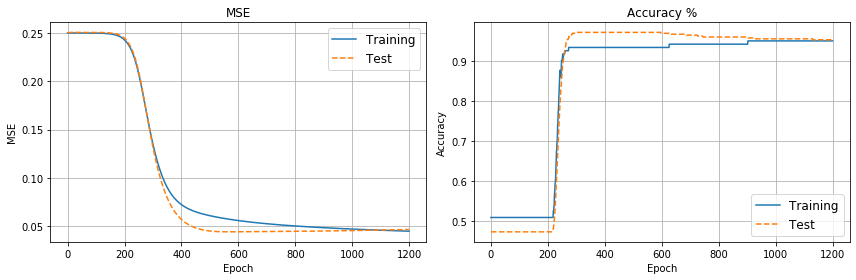

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0449696    0.95082
Test Set      0.0467039    0.953704


In [4]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.0001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.0001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.8,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1200, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history, loss = 'MSE', orientation = "horizontal", name = "monk3")
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

## Reg.

### test: 
- 17->4->1
- lr: 0.8
- kernel_regularizer: 0.001
- momentum: 0.6
- nesterov: True

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


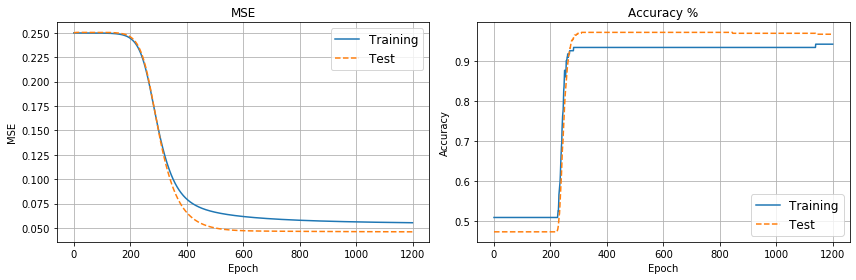

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0553534    0.942623
Test Set      0.0460309    0.967593


In [5]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.0001, kernel_regularizer =  0.001)
model.add(1, kernel_initializer = 0.0001, kernel_regularizer =  0.001)

model.set_optimizer(
    SGD(
        lr = 0.80,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1200, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history, loss = 'MSE', orientation = "horizontal", name = "monk3_reg")
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)